<a href="https://colab.research.google.com/github/Laura-Neff/LabelEncoderAndOneHotEncoder/blob/main/LabelEncoderAndOneHotEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

### GoSales Dataset
Source: https://raw.githubusercontent.com/sandra-calvo/machine-learning-DSX/master/GoSales_Tx_LogisticRegression.csv

Datafields: https://developer.ibm.com/dwblog/2017/watson-machine-learning-within-ibm-data-science-experience/

* IS_TENT : It has the value TRUE or FALSE which tells us if a customer has bought a tent or not.   
* GENDER : Customer's gender  
* AGE : Customer's age (F, M)  
* MARITAL_STATUS : Customer's marital status ('married', 'single', 'unspecified')  
* PROFESSION : Customer's profession ('Professional', 'Other', 'Hospitality', 'Retired', 'Retail', 'Sales', 'Trades', 'Student', 'Executive') 

In [3]:
gosales = pd.read_csv('GoSales_Tx_LogisticRegression.csv')

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
37480,False,M,21,Single,Professional
52948,False,M,24,Single,Other
32068,False,F,24,Single,Other
15158,False,M,32,Single,Trades
31826,False,F,29,Unspecified,Other
32204,False,F,20,Single,Other
14401,False,F,43,Married,Retired
43990,True,M,30,Single,Trades
2677,False,F,32,Single,Professional
43788,False,F,52,Married,Other


In [4]:
gosales.shape

(60252, 5)

In [5]:
gosales.AGE.describe() #describe age column

count    60252.000000
mean        34.187479
std         10.105477
min         17.000000
25%         26.000000
50%         33.000000
75%         41.000000
max         69.000000
Name: AGE, dtype: float64

In [6]:
import matplotlib.pyplot as plt #plot bar graph for categorical values

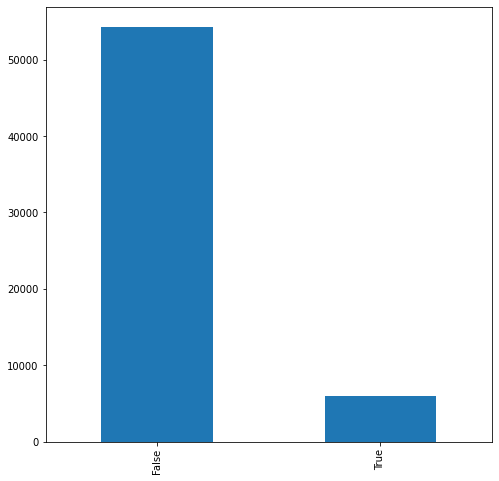

In [7]:
plt.figure(figsize=(8, 8))

pd.value_counts(gosales['IS_TENT']).plot.bar()

plt.show()

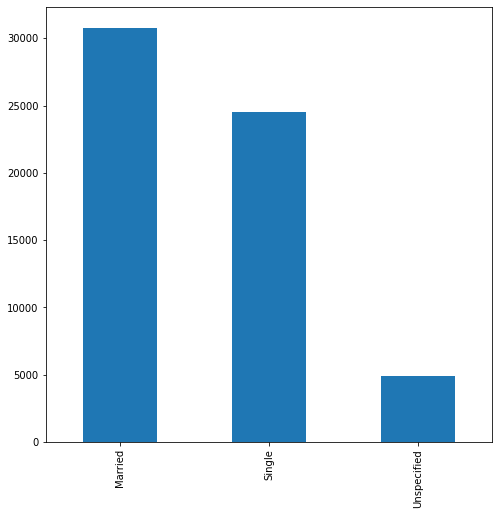

In [8]:
plt.figure(figsize=(8, 8))

pd.value_counts(gosales['MARITAL_STATUS']).plot.bar()

plt.show()

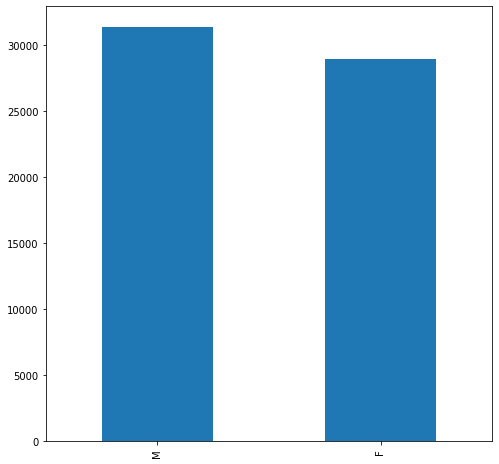

In [9]:
plt.figure(figsize=(8, 8))
pd.value_counts(gosales['GENDER']).plot.bar()
plt.show()

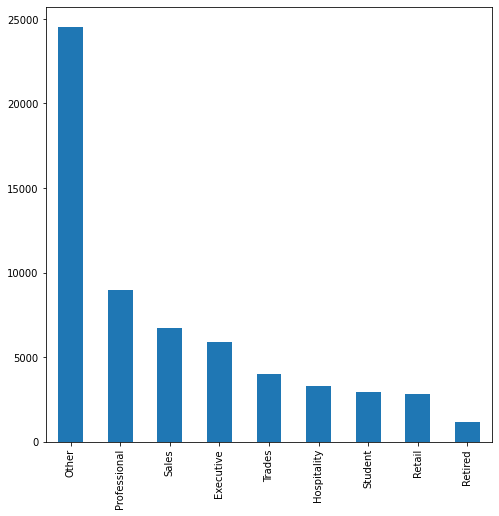

In [10]:
plt.figure(figsize=(8, 8))
pd.value_counts(gosales['PROFESSION']).plot.bar()
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Here we are applying label encoding on 'GENDER' column

In [11]:
gender = ['M', 'F']

In [12]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

label_encoding = label_encoding.fit(gender)

In [13]:
gosales['GENDER'] = label_encoding.transform(gosales['GENDER'].astype(str))

In [14]:
label_encoding.classes_

array(['F', 'M'], dtype='<U1')

In [15]:
gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
31434,False,0,42,Married,Other
21197,False,0,54,Married,Retired
11259,False,0,29,Single,Professional
38657,False,0,30,Married,Executive
25123,False,0,29,Married,Other
31298,False,1,37,Single,Other
48212,False,0,39,Married,Other
19049,False,0,44,Married,Other
33201,False,1,29,Married,Sales
22460,False,1,37,Single,Other


One-hot Encoder
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [16]:
gosales[['MARITAL_STATUS']].sample(5)

,MARITAL_STATUS
37635,Married
14002,Married
36156,Single
38810,Married
15679,Single


In [17]:
one_hot_encoding = preprocessing.OneHotEncoder()

one_hot_encoding = one_hot_encoding.fit(gosales['MARITAL_STATUS'].values.reshape(-1, 1))

In [18]:
one_hot_encoding.categories_

[array(['Married', 'Single', 'Unspecified'], dtype=object)]

In [19]:
one_hot_labels = one_hot_encoding.transform(gosales['MARITAL_STATUS'].values.reshape(-1, 1)).toarray()

#The one-shot encoder expects the input features to be in 2 dimensions, which is why we need to reshape the values in the single column to be 2D

one_hot_labels

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [20]:
one_hot_labels.shape

(60252, 3)

In [21]:
one_hot_labels[:,0]

array([0., 1., 1., ..., 1., 0., 1.])

In [23]:
#Extract columns at 0, 1, and 2
labels_df = pd.DataFrame()

labels_df['MARITAL_STATUS_Married'] = one_hot_labels[:,0]
labels_df['MARITAL_STATUS_Single'] = one_hot_labels[:,1]
labels_df['MARITAL_STATUS_Unspecified'] = one_hot_labels[:,2]

labels_df.head(10)

,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [24]:
encoded_df = pd.concat([gosales, labels_df], axis=1)
encoded_df.drop('MARITAL_STATUS', axis=1, inplace=True)

In [25]:
encoded_df.sample(10)

,IS_TENT,GENDER,AGE,PROFESSION,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
32855,False,1,42,Other,0.0,0.0,1.0
13117,False,1,22,Student,0.0,1.0,0.0
11594,False,1,29,Sales,0.0,1.0,0.0
39457,False,0,33,Hospitality,1.0,0.0,0.0
7087,False,1,27,Other,1.0,0.0,0.0
48178,False,0,33,Other,1.0,0.0,0.0
54904,False,1,40,Executive,0.0,1.0,0.0
17567,False,0,34,Professional,0.0,0.0,1.0
56986,False,0,49,Hospitality,0.0,0.0,1.0
46371,True,1,19,Professional,0.0,1.0,0.0


In [26]:
gosales = pd.get_dummies(encoded_df, columns=['PROFESSION'])

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
20149,False,1,55,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
26514,True,1,34,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0
44241,True,0,48,0.0,0.0,1.0,0,1,0,0,0,0,0,0,0
50845,False,0,22,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
19101,False,1,38,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0
20906,False,0,27,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
47030,True,1,32,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0
46367,False,0,28,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0
6168,False,1,44,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0
31223,False,0,21,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0


We can do one hot encoding using the pandas get_dummies( ) function, which makes it much easier to do one-hot encoding compared to what we did earlier

In [27]:
gosales = pd.get_dummies(encoded_df, columns=['PROFESSION'])

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
7706,False,0,28,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0
9162,False,1,19,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0
55960,False,0,32,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0
20854,False,1,27,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0
44332,False,1,44,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0
3958,False,0,25,1.0,0.0,0.0,0,0,0,0,1,0,0,0,0
50837,False,1,31,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1
18509,False,1,20,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0
31485,False,0,34,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
9603,False,0,33,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0


Using pandas get_dummies( ) function we can scale the whole data.

So here we are loading dataset again and then applying one hot encoding on the whole dataset

In [28]:
gosales = pd.read_csv('GoSales_Tx_LogisticRegression.csv')

gosales.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
9135,False,M,28,Married,Other
16345,False,F,63,Married,Other
44555,False,F,31,Married,Hospitality
18228,False,F,33,Single,Retail
11602,False,F,52,Married,Executive
55812,False,F,29,Single,Retail
1265,True,M,29,Single,Trades
9263,False,F,44,Married,Other
5840,False,F,25,Single,Sales
43945,False,F,21,Single,Professional


In [29]:
gosales = pd.get_dummies(gosales)

gosales.sample(10)

,IS_TENT,AGE,GENDER_F,GENDER_M,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
1723,False,55,0,1,1,0,0,0,0,0,1,0,0,0,0,0
7940,False,49,1,0,1,0,0,0,0,1,0,0,0,0,0,0
45595,False,59,0,1,1,0,0,0,0,0,1,0,0,0,0,0
1888,False,35,1,0,1,0,0,0,0,1,0,0,0,0,0,0
50099,False,28,0,1,0,1,0,0,0,0,0,0,0,0,0,1
52685,False,28,1,0,0,1,0,0,0,1,0,0,0,0,0,0
16252,False,29,0,1,0,1,0,1,0,0,0,0,0,0,0,0
14413,False,26,1,0,0,1,0,0,0,1,0,0,0,0,0,0
49858,False,21,0,1,0,1,0,0,0,1,0,0,0,0,0,0
29111,False,44,0,1,1,0,0,0,0,1,0,0,0,0,0,0
